### 1-Read Dataset

In [94]:
# import liabary
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [95]:
# delete warnings
import warnings
warnings.filterwarnings('ignore')

In [96]:
# read data
df=pd.read_csv(r'D:\ML project & tasks\Datasets\Mall_Customers.csv')

In [97]:
# show first 5 row of data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2-EDA

In [99]:
# display shape of data
df.shape

(200, 5)

In [100]:
# display information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [101]:
# check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [102]:
# check duplicated
df.duplicated().sum()

0

In [103]:
# show discribe about data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [104]:
# display columns name
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [105]:
#change name of columns
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendingScore'},inplace=True)

In [106]:
df.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


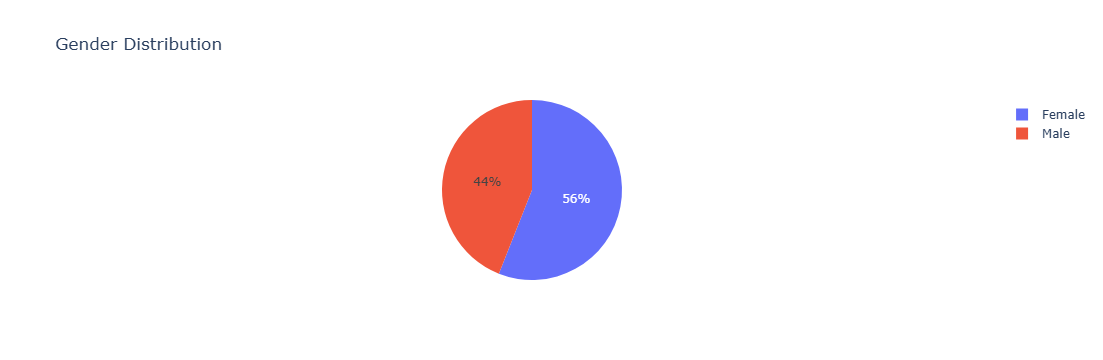

In [107]:
import plotly.express as px
fig = px.pie(df, names=df['Gender'].value_counts().index, values=df['Gender'].value_counts().values, title='Gender Distribution')
fig.show()

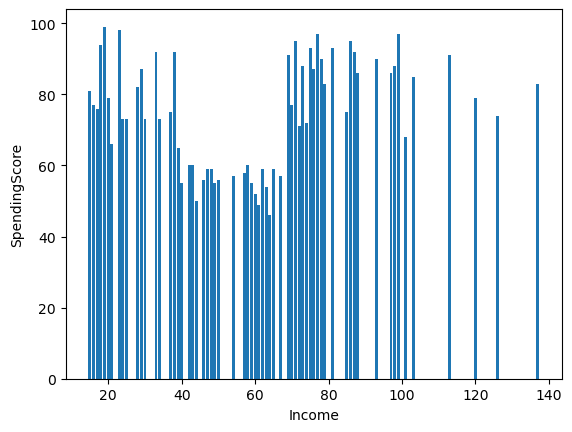

In [108]:
plt.bar(df['Income'],df['SpendingScore'])
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.show()

In [109]:
df.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [110]:
# important columns
df=df.iloc[:,[3,4]]

In [111]:
df.head()

,Income,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Build Model

### 1-use DBSCAN Model

In [308]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=10,min_samples=7,metric='euclidean')
y_pred=db.fit_predict(df)

In [310]:
y_pred

array([ 2,  1,  0,  1,  2,  1,  0, -1,  0,  1,  0, -1,  0,  1,  0,  1,  2,
        1,  2, -1,  2,  1,  0,  1,  0,  1,  2, -1,  2,  1,  0,  1,  0, -1,
        0,  1,  0,  1,  2,  1,  2, -1,  2,  2,  2,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3, -1,  3, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [312]:
# silhouette score
from sklearn.metrics import silhouette_score
print('silhouette_score : %0.4f'%silhouette_score(df,y_pred))

silhouette_score : 0.4218


In [314]:
# display Number of Cluster
n_cluster=set()
for k in y_pred:
    if k!=-1:
      n_cluster.add(k) 
print('Number of Cluster = ',len(n_cluster))

Number of Cluster =  5


In [316]:
df['Cluster']=y_pred

In [318]:
df.head(10)

,Income,SpendingScore,Cluster
0,15,39,2
1,15,81,1
2,16,6,0
3,16,77,1
4,17,40,2
5,17,76,1
6,18,6,0
7,18,94,-1
8,19,3,0
9,19,72,1


In [330]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]
df3=df[df.Cluster==3]
df4=df[df.Cluster==4]
df_1=df[df.Cluster==-1]

In [332]:
df0.head()

,Income,SpendingScore,Cluster
2,16,6,0
6,18,6,0
8,19,3,0
10,19,14,0
12,20,15,0


In [334]:
df1.head()

,Income,SpendingScore,Cluster
1,15,81,1
3,16,77,1
5,17,76,1
9,19,72,1
13,20,77,1


In [336]:
df4.head()

,Income,SpendingScore,Cluster
128,71,11,4
130,71,9,4
134,73,5,4
136,73,7,4
138,74,10,4


In [338]:
# outlier
df_1.head()

,Income,SpendingScore,Cluster
7,18,94,-1
11,19,99,-1
19,23,98,-1
27,28,61,-1
33,33,92,-1


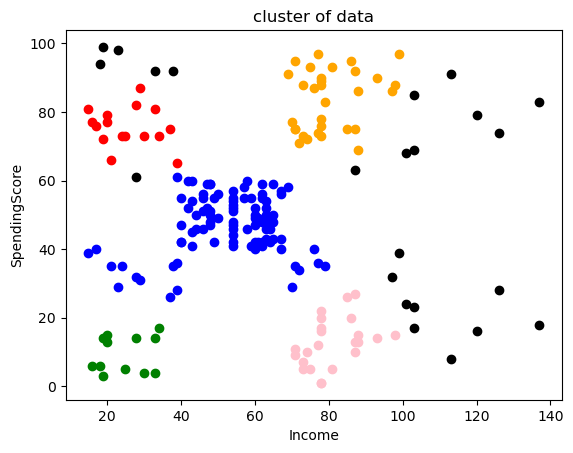

In [342]:
plt.scatter(df0['Income'],df0['SpendingScore'],color='green')
plt.scatter(df1['Income'],df1['SpendingScore'],color='red')
plt.scatter(df2['Income'],df2['SpendingScore'],color='blue')
plt.scatter(df3['Income'],df3['SpendingScore'],color='orange')
plt.scatter(df4['Income'],df4['SpendingScore'],color='pink')
plt.scatter(df_1['Income'],df_1['SpendingScore'],color='black')
plt.title('cluster of data')
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.show()

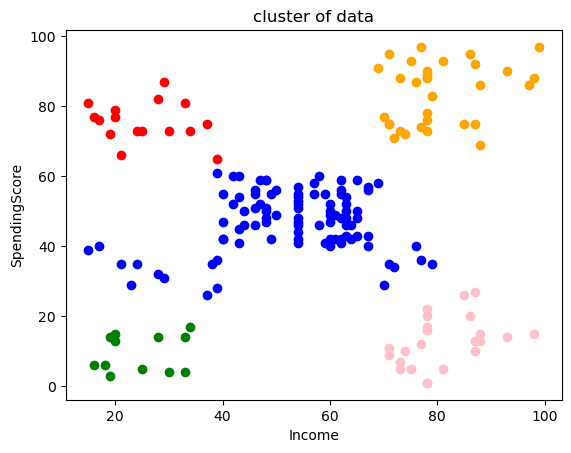

In [344]:
# without outlier
plt.scatter(df0['Income'],df0['SpendingScore'],color='green')
plt.scatter(df1['Income'],df1['SpendingScore'],color='red')
plt.scatter(df2['Income'],df2['SpendingScore'],color='blue')
plt.scatter(df3['Income'],df3['SpendingScore'],color='orange')
plt.scatter(df4['Income'],df4['SpendingScore'],color='pink')
plt.title('cluster of data')
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.show()

### 2-use hierarchical clustring

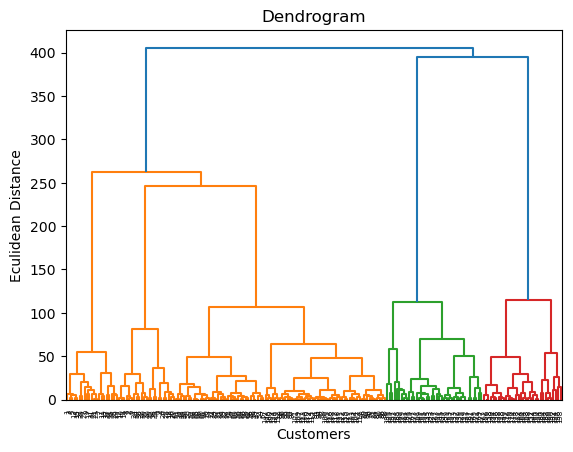

In [346]:
import scipy.cluster.hierarchy as sch
d=sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eculidean Distance')
plt.show()

In [354]:
# first type of hierarchical
from sklearn.cluster import AgglomerativeClustering
Agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_pred_Agg=Agg.fit_predict(df)

In [356]:
y_pred_Agg

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [358]:
# silhouette score
from sklearn.metrics import silhouette_score
print('silhouette_score : %0.4f'%silhouette_score(df,y_pred_Agg))

silhouette_score : 0.5523


In [360]:
df['Cluster_Agg']=y_pred_Agg

In [362]:
df.head()

,Income,SpendingScore,Cluster,Cluster_Agg
0,15,39,2,4
1,15,81,1,3
2,16,6,0,4
3,16,77,1,3
4,17,40,2,4


In [364]:
df0_Agg=df[df.Cluster_Agg==0]
df1_Agg=df[df.Cluster_Agg==1]
df2_Agg=df[df.Cluster_Agg==2]
df3_Agg=df[df.Cluster_Agg==3]
df4_Agg=df[df.Cluster_Agg==4]

In [366]:
df4_Agg.head()

,Income,SpendingScore,Cluster,Cluster_Agg
0,15,39,2,4
2,16,6,0,4
4,17,40,2,4
6,18,6,0,4
8,19,3,0,4


In [368]:
df0_Agg.head()

,Income,SpendingScore,Cluster,Cluster_Agg
128,71,11,4,0
130,71,9,4,0
134,73,5,4,0
136,73,7,4,0
138,74,10,4,0


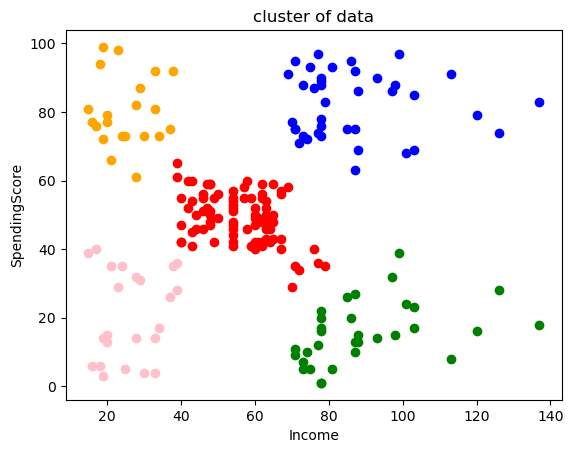

In [370]:
# without outlier
plt.scatter(df0_Agg['Income'],df0_Agg['SpendingScore'],color='green')
plt.scatter(df1_Agg['Income'],df1_Agg['SpendingScore'],color='red')
plt.scatter(df2_Agg['Income'],df2_Agg['SpendingScore'],color='blue')
plt.scatter(df3_Agg['Income'],df3_Agg['SpendingScore'],color='orange')
plt.scatter(df4_Agg['Income'],df4_Agg['SpendingScore'],color='pink')
plt.title('cluster of data')
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.show()

### 3-use KMeans

In [375]:
from sklearn.cluster import KMeans
scores=[]
silhouette_s=[]
k_range=range(2,11)

for k in k_range:
    km=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=42)
    y_pred=km.fit_predict(df)
    scores.append(km.inertia_)
    silhouette_s.append(silhouette_score(df,y_pred))
    print("k = ",k,'  ',km.inertia_)
    print('silhouette_score : %0.4f'%silhouette_score(df,y_pred)) # preformance of all k 

k =  2    181938.7272727273
silhouette_score : 0.2964
k =  3    106900.14895823046
silhouette_score : 0.4669
k =  4    74097.84178255001
silhouette_score : 0.4930
k =  5    44759.85685811773
silhouette_score : 0.5538
k =  6    37492.52060701251
silhouette_score : 0.5398
k =  7    30377.49151318089
silhouette_score : 0.5299
k =  8    25123.445108669766
silhouette_score : 0.4599
k =  9    22009.515752095722
silhouette_score : 0.4589
k =  10    19855.49522664416
silhouette_score : 0.4507


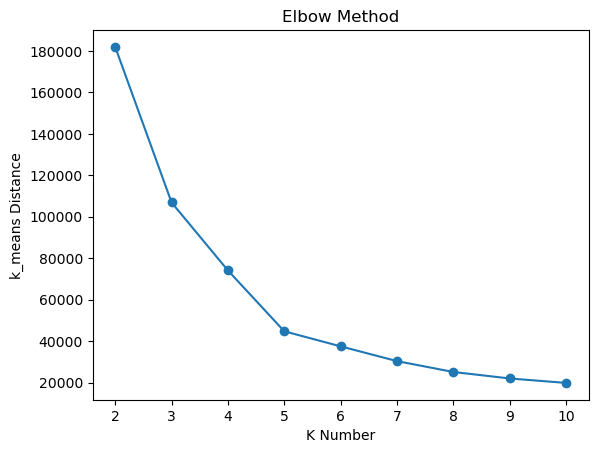

In [377]:
# plot elbow to khnow k number of cluster
plt.plot(k_range,scores,marker='o')
plt.title('Elbow Method')
plt.xlabel('K Number')
plt.ylabel('k_means Distance')
plt.show()

In [379]:
# k=5
km_model=KMeans(n_clusters=5,random_state=42)
km_model.fit(df)
y_pred_km=km_model.predict(df)

In [381]:
y_pred_km

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [383]:
# preformance of model
print('silhouette_score : %0.4f'%silhouette_score(df,y_pred_km))

silhouette_score : 0.5538


In [385]:
# displau centers
km_model.cluster_centers_

array([[5.52962963e+01, 4.95185185e+01, 2.00000000e+00, 1.00000000e+00],
       [8.65384615e+01, 8.21282051e+01, 2.17948718e+00, 2.00000000e+00],
       [2.57272727e+01, 7.93636364e+01, 4.54545455e-01, 2.90909091e+00],
       [8.82000000e+01, 1.71142857e+01, 2.54285714e+00, 8.57142857e-02],
       [2.63043478e+01, 2.09130435e+01, 9.56521739e-01, 4.00000000e+00]])

In [387]:
df['Cluster_KM']=y_pred_km

In [389]:
df.head()

,Income,SpendingScore,Cluster,Cluster_Agg,Cluster_KM
0,15,39,2,4,4
1,15,81,1,3,2
2,16,6,0,4,4
3,16,77,1,3,2
4,17,40,2,4,4


In [391]:
df0_KM=df[df.Cluster_KM==0]
df1_KM=df[df.Cluster_KM==1]
df2_KM=df[df.Cluster_KM==2]
df3_KM=df[df.Cluster_KM==3]
df4_KM=df[df.Cluster_KM==4]

In [393]:
df0_KM.head()

,Income,SpendingScore,Cluster,Cluster_Agg,Cluster_KM
43,39,61,2,1,0
46,40,55,2,1,0
47,40,47,2,1,0
48,40,42,2,1,0
49,40,42,2,1,0


In [395]:
df4_KM.head()

,Income,SpendingScore,Cluster,Cluster_Agg,Cluster_KM
0,15,39,2,4,4
2,16,6,0,4,4
4,17,40,2,4,4
6,18,6,0,4,4
8,19,3,0,4,4


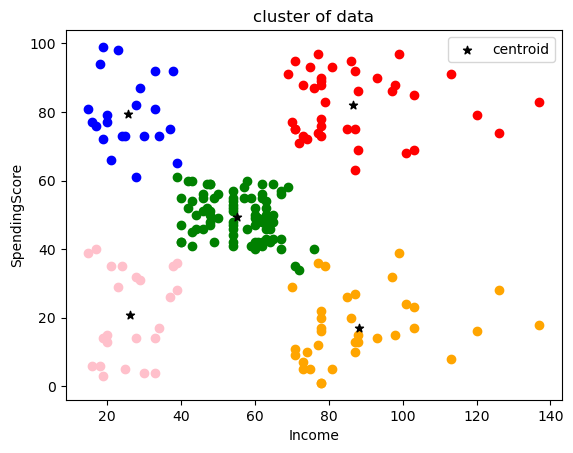

In [401]:
plt.scatter(df0_KM['Income'],df0_KM['SpendingScore'],color='green')
plt.scatter(df1_KM['Income'],df1_KM['SpendingScore'],color='red')
plt.scatter(df2_KM['Income'],df2_KM['SpendingScore'],color='blue')
plt.scatter(df3_KM['Income'],df3_KM['SpendingScore'],color='orange')
plt.scatter(df4_KM['Income'],df4_KM['SpendingScore'],color='pink')
plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.title('cluster of data')
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.legend()
plt.show()